# **Behavioral Cloning** 
---

**Behavioral Cloning Project**

The goals / steps of this project are the following:
* Use the simulator to collect data of good driving behavior
* Build, a convolution neural network in Keras that predicts steering angles from images
* Train and validate the model with a training and validation set
* Test that the model successfully drives around track one without leaving the road
* Summarize the results with a written report

This project is done based on NVIDIA's End-To-End Deep Learning for Self-Driving Cars which can be found [in this link]

[in this link]: https://devblogs.nvidia.com/deep-learning-self-driving-cars/

### Use the simulator to collect data of good driving behavior

To collect the good driving behavior data, we use a simulator provided by Udacity. It can be downloaded from [here]. There are two different tracks which we can perform our behavioral cloning in which they are of different difficulties. At the beginning, the training data can be collected by clicking on the recording button and have the training data saved into a data folder. The data saved will be in form of a csv file. The csv file will contain few information separated by comma, eg. Center Camera Image, Left Camera Image, Right Camera Image, Steering Angle, Acceleration and Braking.


<img src="./examples/Homepage_simulator.png" width="300" height="300"/>
<img src="./examples/training.png" width="300" height="300"/>


[here]: https://d17h27t6h515a5.cloudfront.net/topher/2016/November/5831f3a4_simulator-windows-64/simulator-windows-64.zip


In [1]:
import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
# Used to split test and train sets
from sklearn.model_selection import train_test_split
# Keras is a high level wrapper on top of tensorflow (machine learning library)
# The Sequential container is a linear stack of layers
from keras.models import Sequential
# Popular optimization strategy that uses gradient descent 
from keras.optimizers import Adam
# To save our model periodically as checkpoints for loading later
from keras.callbacks import ModelCheckpoint, EarlyStopping
# Types of layers do we want our model to have
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Cropping2D

%matplotlib inline

C:\Users\brand\Miniconda3\envs\carnd\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS = 66, 200, 3
INPUT_SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)

def crop(image):
    """
    Crop the image (removing the sky at the top and the car front at the bottom)
    """
    return image[60:-23, :, :] # remove the sky and the car front


def resize(image):
    """
    Resize the image to the input shape used by the network model
    """
    return cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT), cv2.INTER_AREA)


def color_change(image):

    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


def preprocess(image):
    """
    Combine all preprocess functions into one
    """
    image = crop(image)
    image = resize(image)
    image = color_change(image)
    return image

### Displaying the data

,Center,Left,Right,Steering,Throttle,Reverse,Speed
0,C:\Users\brand\Documents\Temporary Work Folder...,C:\Users\brand\Documents\Temporary Work Folde...,C:\Users\brand\Documents\Temporary Work Folde...,0.000000,0.024469,0,0.028581
1,C:\Users\brand\Documents\Temporary Work Folder...,C:\Users\brand\Documents\Temporary Work Folde...,C:\Users\brand\Documents\Temporary Work Folde...,0.000000,0.324360,0,0.291320
2,C:\Users\brand\Documents\Temporary Work Folder...,C:\Users\brand\Documents\Temporary Work Folde...,C:\Users\brand\Documents\Temporary Work Folde...,0.000000,0.452234,0,0.896548
3,C:\Users\brand\Documents\Temporary Work Folder...,C:\Users\brand\Documents\Temporary Work Folde...,C:\Users\brand\Documents\Temporary Work Folde...,0.000000,0.305613,0,1.388356
4,C:\Users\brand\Documents\Temporary Work Folder...,C:\Users\brand\Documents\Temporary Work Folde...,C:\Users\brand\Documents\Temporary Work Folde...,0.000000,0.612835,0,1.966049
5,C:\Users\brand\Documents\Temporary Work Folder...,C:\Users\brand\Documents\Temporary Work Folde...,C:\Users\brand\Documents\Temporary Work Folde...,0.000000,0.479419,0,2.704091
6,C:\Users\brand\Documents\Temporary Work Folder...,C:\Users\brand\Documents\Temporary Work Folde...,C:\Users\brand\Documents\Temporary Work Folde...,0.000000,0.749492,0,3.516304
7,C:\Users\brand\Documents\Temporary Work Folder...,C:\Users\brand\Documents\Temporary Work Folde...,C:\Users\brand\Documents\Temporary Work Folde...,-0.143176,1.000000,0,4.625369
8,C:\Users\brand\Documents\Temporary Work Folder...,C:\Users\brand\Documents\Temporary Work Folde...,C:\Users\brand\Documents\Temporary Work Folde...,-0.117458,0.886081,0,5.773567
9,C:\Users\brand\Documents\Temporary Work Folder...,C:\Users\brand\Documents\Temporary Work Folde...,C:\Users\brand\Documents\Temporary Work Folde...,0.000000,0.808497,0,6.669478


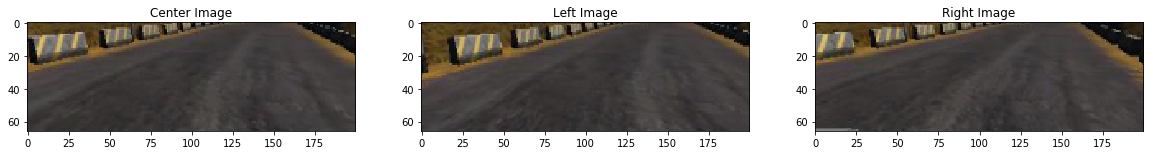

In [3]:
path_to_data = "./training_data_2/driving_log.csv"
data = []

df = pd.read_csv(path_to_data, names=['Center', 'Left', 'Right', 'Steering', 'Throttle', 'Reverse', 'Speed'])
display(df)
       
## Visualize the images
index_to_visualize = 1550
titles = ['Center Image','Left Image', 'Right Image']
fig , ax = plt.subplots(1,3,figsize=(20,10))

for i in range(3):
    image_to_visualize = df.iloc[index_to_visualize,i].split("\\")[-1]
    image_to_visualize = './training_data_2/IMG/' + image_to_visualize
    img = preprocess(cv2.imread(image_to_visualize))
    
    ax[i].imshow(img)
    ax[i].set_title(titles[i])

### Pre-processing the Images before training

In [4]:
# Add all the images into the X set and all the steering angles into the Y set
X, Y = [], []
correction = 0.2
for i in range(len(df)):
    current_line = df.iloc[i]
    
    center_img = current_line['Center'].strip()
    left_img = current_line['Left'].strip()
    right_img = current_line['Right'].strip()
    steering = current_line['Steering']
    
    for img, angle in [(center_img,0),(left_img,correction),(right_img,-correction)]:
    
        # Read the image
        image_path = './training_data_2/IMG/' + img.split("\\")[-1]
        img = cv2.imread(image_path)
        img = preprocess(img)
        
        # Append the image with corrected steering and the flipped image
        X.append(img)
        Y.append(steering + angle)
        X.append(cv2.flip(img, 1))
        Y.append(-(steering + angle))        
        
print('There are in total {} of datasets to be trained'.format(len(X)))

X = np.array(X).astype('float32')
Y = np.array(Y).astype('float32')
print(X.shape)

There are in total 24180 of datasets to be trained
(24180, 66, 200, 3)


(array([  11.,   10.,    7.,   24.,   25.,   53.,   61.,   95.,  164.,
         197.,  335.,  405.,  434.,  537.,  638.,  693., 4179.,  834.,
         851.,  781., 4293.,  851.,  834., 4179.,  693.,  638.,  537.,
         434.,  405.,  335.,  197.,  164.,   95.,   61.,   53.,   25.,
          24.,    7.,   10.,   11.]),
 array([-1.20000005, -1.14000005, -1.08000004, -1.02000004, -0.96000004,
        -0.90000004, -0.84000003, -0.78000003, -0.72000003, -0.66000003,
        -0.60000002, -0.54000002, -0.48000002, -0.42000002, -0.36000001,
        -0.30000001, -0.24000001, -0.18000001, -0.12      , -0.06      ,
         0.        ,  0.06      ,  0.12      ,  0.18000001,  0.24000001,
         0.30000001,  0.36000001,  0.42000002,  0.48000002,  0.54000002,
         0.60000002,  0.66000003,  0.72000003,  0.78000003,  0.84000003,
         0.90000004,  0.96000004,  1.02000004,  1.08000004,  1.14000005,
         1.20000005]),
 <a list of 40 Patch objects>)

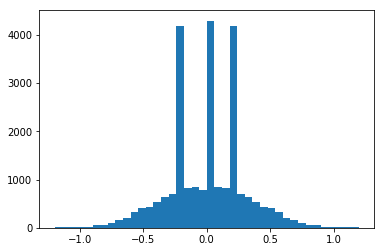

In [5]:
plt.hist(Y, bins=40)

### Building the model

In [6]:
def construct_model():
    """
    NVIDIA model used, referenced as a starting point
    Image normalization to avoid saturation and make gradients work better.
    Convolution: 5x5, filter: 24, strides: 2x2, activation: ELU
    Convolution: 5x5, filter: 36, strides: 2x2, activation: ELU
    Convolution: 5x5, filter: 48, strides: 2x2, activation: ELU
    Convolution: 3x3, filter: 64, strides: 1x1, activation: ELU
    Convolution: 3x3, filter: 64, strides: 1x1, activation: ELU
    Drop out (0.5)
    Fully connected: neurons: 100, activation: ELU
    Fully connected: neurons: 50, activation: ELU
    Fully connected: neurons: 10, activation: ELU
    Fully connected: neurons: 1 (output)
    # the convolution layers are meant to handle feature engineering
    the fully connected layer for predicting the steering angle.
    dropout avoids overfitting
    ELU(Exponential linear unit) function takes care of the Vanishing gradient problem. 
    """
    
    model = Sequential()
    """
    # Image normalization to avoid saturation and make gradients work better.
    model.add(Lambda(lambda x: x/127.5-1.0, input_shape=INPUT_SHAPE))
    """
    model.add(Lambda(lambda x: x /255.0 - 0.5, input_shape=INPUT_SHAPE ))
    # Convolutions
    model.add(Conv2D(24, 5, 5, subsample=(2,2), activation='elu'))
    model.add(Conv2D(36, 5, 5, subsample=(2,2), activation='elu'))
    model.add(Conv2D(48, 5, 5, subsample=(2,2), activation='elu'))
    model.add(Conv2D(64, 3, 3, subsample=(1,1), activation='elu'))
    model.add(Conv2D(64, 3, 3, subsample=(1,1), activation='elu'))
    # Drop out (0.5)
    model.add(Dropout(0.5))
    # FCNs
    model.add(Flatten())
    model.add(Dense(100, activation='elu'))
    model.add(Dense(50, activation='elu'))
    model.add(Dense(10, activation='elu'))
    model.add(Dense(1, activation='elu'))
    model.summary()

    return model

### Training

In [7]:
epochs = 5
batch_size = 128

model = construct_model()

C:\Users\brand\Miniconda3\envs\carnd\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), strides=(2, 2), activation="elu")`
C:\Users\brand\Miniconda3\envs\carnd\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), strides=(2, 2), activation="elu")`
C:\Users\brand\Miniconda3\envs\carnd\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), strides=(2, 2), activation="elu")`
C:\Users\brand\Miniconda3\envs\carnd\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), strides=(1, 1), activation="elu")`
C:\Users\brand\Miniconda3\envs\carnd\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), strides=(1, 1), activation="elu")`


Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 66, 200, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
dro

In [8]:
# Using adam optimizer and also mean squared error as the loss function
model.compile(optimizer='adam', loss='mse')

checkpoint = ModelCheckpoint("model.h5", monitor='val_loss', verbose=1,
                                  save_best_only=True, mode='min')

early_stop = EarlyStopping(monitor='val_mean_squared_error', min_delta=0.0001, patience=4,
                                verbose=1, mode='min')

model.fit(X, Y, batch_size=batch_size, nb_epoch=epochs, verbose=1,
                      callbacks=[checkpoint, early_stop], validation_split=0.20, shuffle=True)

model.save('model.h5')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


C:\Users\brand\Miniconda3\envs\carnd\lib\site-packages\keras\models.py:874: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 19344 samples, validate on 4836 samples
Epoch 1/5
19344/19344 [==============================] - 15s 770us/step - loss: 0.0491 - val_loss: 0.0350
Epoch 2/5
  256/19344 [..............................] - ETA: 10s - loss: 0.0391

C:\Users\brand\Miniconda3\envs\carnd\lib\site-packages\keras\callbacks.py:493: RuntimeWarning: Early stopping conditioned on metric `val_mean_squared_error` which is not available. Available metrics are: val_loss,loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


19344/19344 [==============================] - 12s 642us/step - loss: 0.0363 - val_loss: 0.0318
Epoch 3/5
19344/19344 [==============================] - 12s 625us/step - loss: 0.0346 - val_loss: 0.0299
Epoch 4/5
19344/19344 [==============================] - 14s 713us/step - loss: 0.0343 - val_loss: 0.0318
Epoch 5/5
19344/19344 [==============================] - 15s 752us/step - loss: 0.0335 - val_loss: 0.0297



### Model Architecture and Training Strategy

#### 1. An appropriate model architecture has been employed

My model consists of a convolution neural network with 3x3 filter sizes and depths between 32 and 128 (model.py lines 18-24) 

The model includes RELU layers to introduce nonlinearity (code line 20), and the data is normalized in the model using a Keras lambda layer (code line 18). 

#### 2. Attempts to reduce overfitting in the model

The model contains dropout layers in order to reduce overfitting (model.py lines 21). 

The model was trained and validated on different data sets to ensure that the model was not overfitting (code line 10-16). The model was tested by running it through the simulator and ensuring that the vehicle could stay on the track.

#### 3. Model parameter tuning

The model used an adam optimizer, so the learning rate was not tuned manually (model.py line 25).

#### 4. Appropriate training data

Training data was chosen to keep the vehicle driving on the road. I used a combination of center lane driving, recovering from the left and right sides of the road ... 

For details about how I created the training data, see the next section. 

### Model Architecture and Training Strategy

#### 1. Solution Design Approach

The overall strategy for deriving a model architecture was to ...

My first step was to use a convolution neural network model similar to the ... I thought this model might be appropriate because ...

In order to gauge how well the model was working, I split my image and steering angle data into a training and validation set. I found that my first model had a low mean squared error on the training set but a high mean squared error on the validation set. This implied that the model was overfitting. 

To combat the overfitting, I modified the model so that ...

Then I ... 

The final step was to run the simulator to see how well the car was driving around track one. There were a few spots where the vehicle fell off the track... to improve the driving behavior in these cases, I ....

At the end of the process, the vehicle is able to drive autonomously around the track without leaving the road.

#### 2. Final Model Architecture

The final model architecture (model.py lines 18-24) consisted of a convolution neural network with the following layers and layer sizes ...

Here is a visualization of the architecture (note: visualizing the architecture is optional according to the project rubric)

![alt text][image1]

#### 3. Creation of the Training Set & Training Process

To capture good driving behavior, I first recorded two laps on track one using center lane driving. Here is an example image of center lane driving:

![alt text][image2]

I then recorded the vehicle recovering from the left side and right sides of the road back to center so that the vehicle would learn to .... These images show what a recovery looks like starting from ... :

![alt text][image3]
![alt text][image4]
![alt text][image5]

Then I repeated this process on track two in order to get more data points.

To augment the data sat, I also flipped images and angles thinking that this would ... For example, here is an image that has then been flipped:

![alt text][image6]
![alt text][image7]

Etc ....

After the collection process, I had X number of data points. I then preprocessed this data by ...


I finally randomly shuffled the data set and put Y% of the data into a validation set. 

I used this training data for training the model. The validation set helped determine if the model was over or under fitting. The ideal number of epochs was Z as evidenced by ... I used an adam optimizer so that manually training the learning rate wasn't necessary.

[//]: # (Image References)

[image1]: ./examples/placeholder.png "Model Visualization"
[image2]: ./examples/placeholder.png "Grayscaling"
[image3]: ./examples/placeholder_small.png "Recovery Image"
[image4]: ./examples/placeholder_small.png "Recovery Image"
[image5]: ./examples/placeholder_small.png "Recovery Image"
[image6]: ./examples/placeholder_small.png "Normal Image"
[image7]: ./examples/placeholder_small.png "Flipped Image"